In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
import os
os.getcwd()

'c:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660'

In [7]:
cd/Users/dbasava/Desktop/Darshan Doc/5660/Train

c:\Users\dbasava\Desktop\Darshan Doc\5660\Train


In [8]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()


for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (50,50), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)

In [9]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 28, 28, 3) (39209,)


In [10]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 28, 28, 3) (39209,)
(31367, 28, 28, 3) (7842, 28, 28, 3) (31367,) (7842,)


In [11]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [13]:
train_data=pd.read_csv('c:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660\\train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('c:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660\\test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Width   39209 non-null  int64 
 1   Height  39209 non-null  int64 
 2   label   39209 non-null  int64 
 3   path    39209 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [14]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [15]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [16]:
cd/Users/dbasava/Desktop/Darshan Doc/5660

c:\Users\dbasava\Desktop\Darshan Doc\5660


In [17]:
os.getcwd()

'c:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660'

C:\Users\dbasava\AppData\Local\Temp\ipykernel_19952\680849438.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


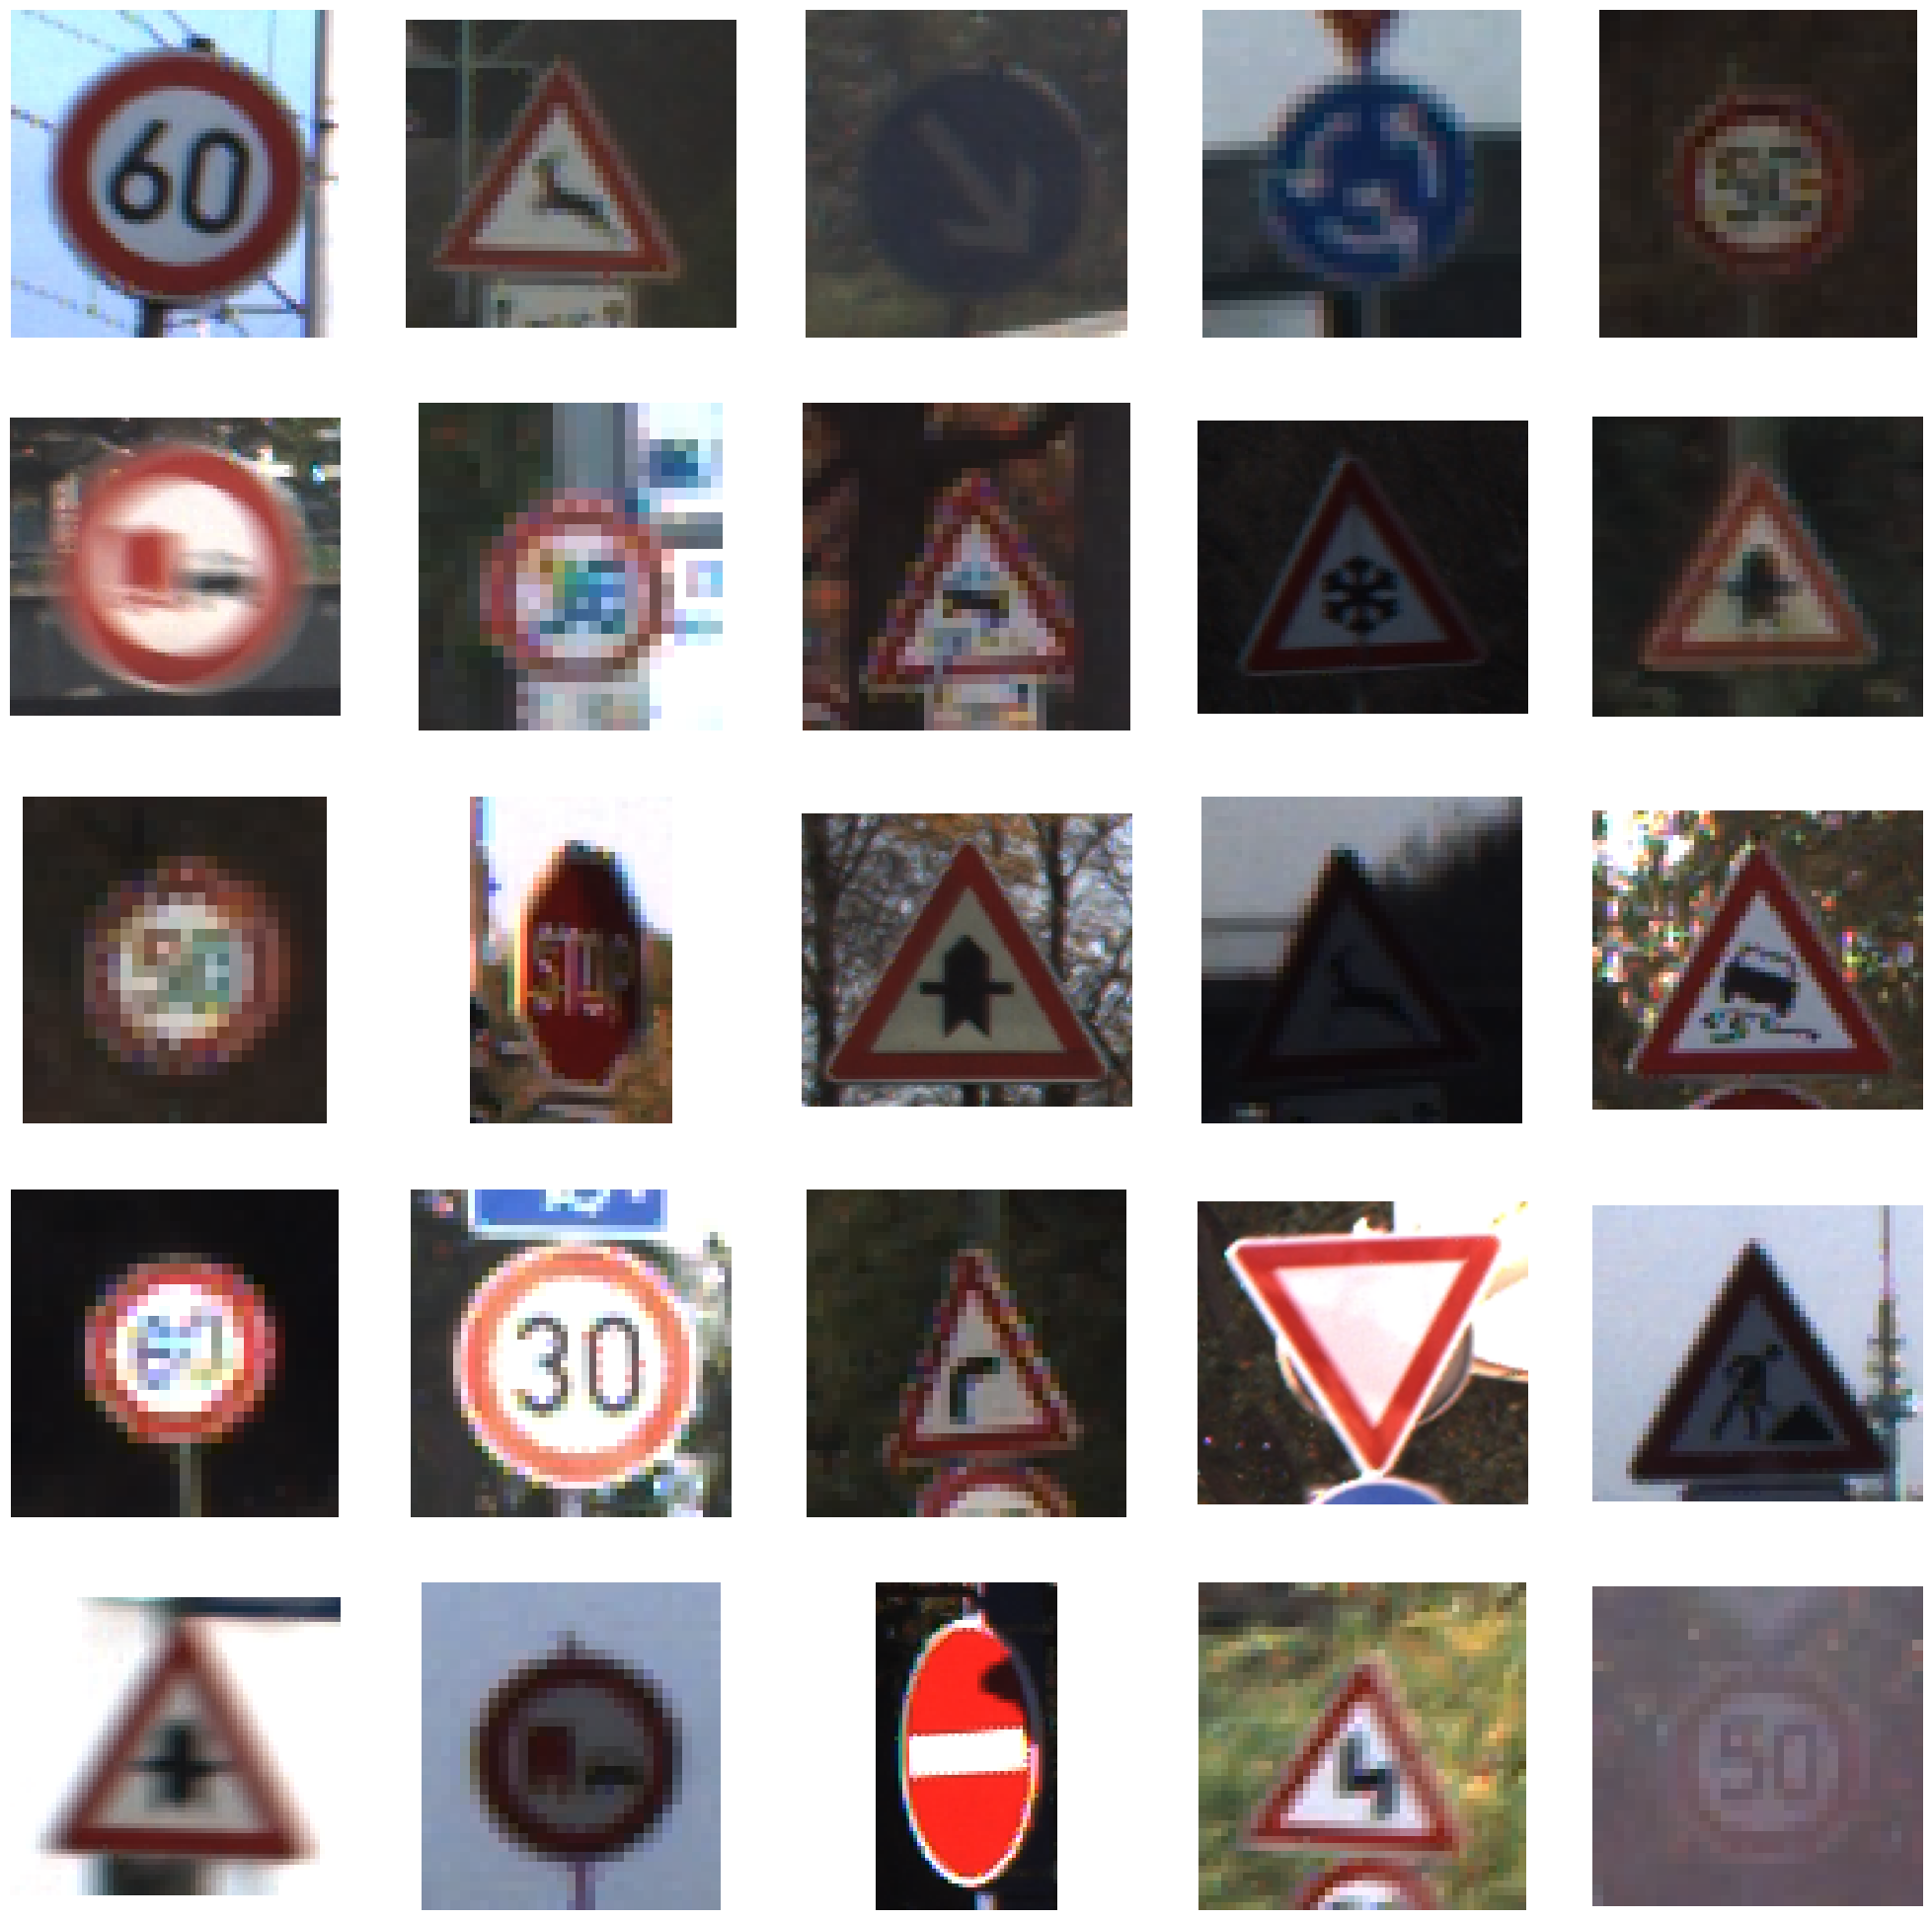

In [18]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

i = 1
while i <= 25:
    plt.subplot(5, 5, i)
    random_image_path = data_dir + '/' + imgs[random.randint(0, len(imgs)-1)]
    random_image = imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0], fontsize=20)
    plt.ylabel(random_image.shape[0], fontsize=20)
    i += 1

In [19]:
cd/Users/dbasava/Desktop/Darshan Doc/5660/train

c:\Users\dbasava\Desktop\Darshan Doc\5660\train


Text(0, 0.5, 'Number of images')

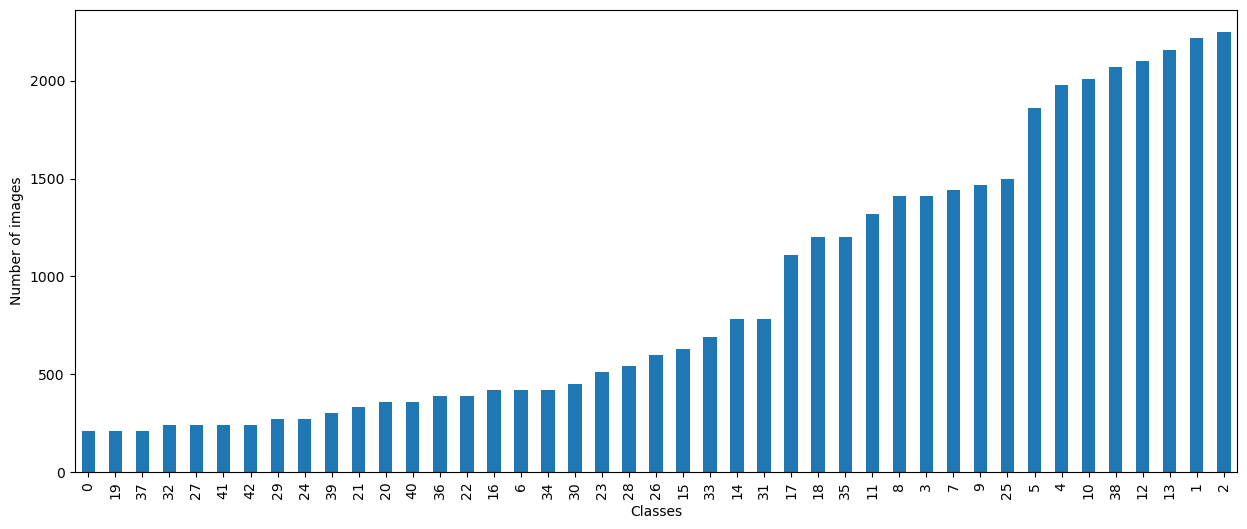

In [20]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [21]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          36928     
                                                        

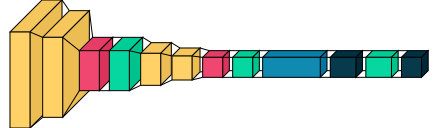

In [23]:
import visualkeras
visualkeras.layered_view(model)

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 2
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("../output/my_model.h5")

Epoch 1/2
491/491 [==============================] - 45s 89ms/step - loss: 1.9909 - accuracy: 0.4966 - val_loss: 0.5799 - val_accuracy: 0.8699
Epoch 2/2
491/491 [==============================] - 49s 99ms/step - loss: 0.6717 - accuracy: 0.8038 - val_loss: 0.2236 - val_accuracy: 0.9444


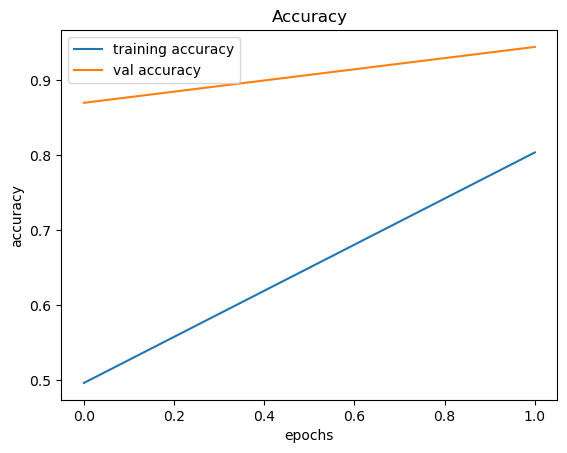

In [25]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

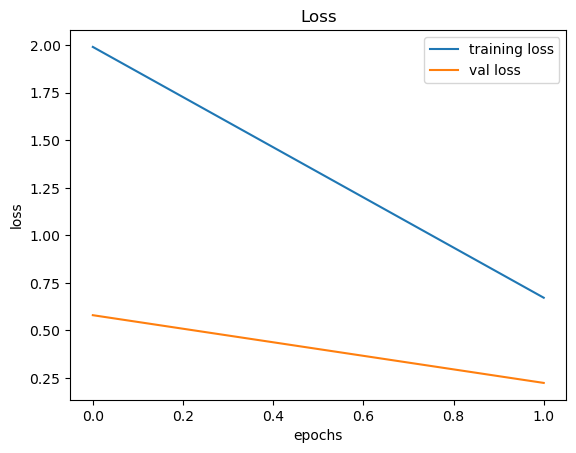

In [26]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.22363847494125366
Test accuracy 0.9444019198417664


In [28]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 12ms/step


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.93      0.92      0.92       496
           2       0.89      0.95      0.92       420
           3       0.87      0.98      0.92       294
           4       0.92      0.94      0.93       400
           5       0.86      0.80      0.83       364
           6       1.00      0.99      0.99        69
           7       0.95      0.85      0.90       313
           8       0.93      0.89      0.91       274
           9       0.98      0.99      0.99       277
          10       0.99      1.00      0.99       398
          11       0.93      0.97      0.95       261
          12       0.98      1.00      0.99       443
          13       1.00      1.00      1.00       422
          14       0.98      0.96      0.97       135
          15       0.97      0.99      0.98       118
          16       0.95      0.95      0.95        86
          17       0.98    

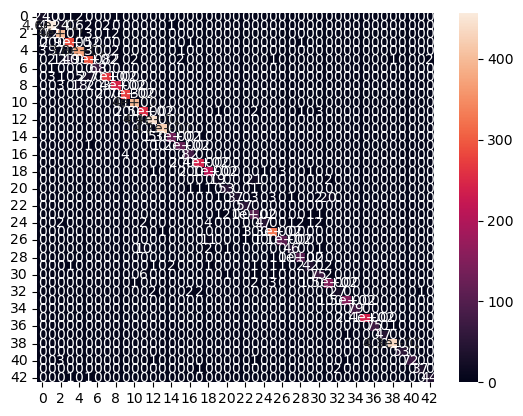

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('../output/h1.png')

In [31]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
cnn_accuracy=accuracy_score(y_pred_class,y_test_class)
cnn_accuracy



0.9444019382810508

In [32]:
model.save('../output/traffic_classifier.h5')

In [39]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('../output/traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((28,28))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = numpy.argmax(model.predict([image]), axis=-1)[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='Red',font=('arial',14,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',14,'bold'))

upload.pack(side=BOTTOM,pady=60)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 121ms/step
General caution


gui


SVM

In [ ]:
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
# Load dataset
data_folder = "c:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660\\Train"
data = []
labels = []
try:
    for label in os.listdir(data_folder):
        path = os.path.join(data_folder, label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28)) # resize image to 28x28
            hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            data.append(hog_features)
            labels.append(int(label))
except Exception as e:
    print(str(e))


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
clf = svm.SVC(kernel='linear', C=1, gamma='scale',probability=True)

clf.fit(data, labels)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
class_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 
               'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 
               'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 
               'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 
               'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 
               'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 
               'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 
               'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 
               'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 
               'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']

In [ ]:
# # Train SVM classifier

accuracies = []
num_models = 5

for i in range(num_models):
    
    clf = svm.SVC(kernel='linear', C=1, gamma='scale',probability=True)
    clf.fit(np.asarray(X_train), np.asarray(y_train))
    
    # Predict labels for test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    svm_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracy to the list
    accuracies.append(svm_accuracy)
       

print("Accuracy:", svm_accuracy)

Accuracy: 0.8256822239224687


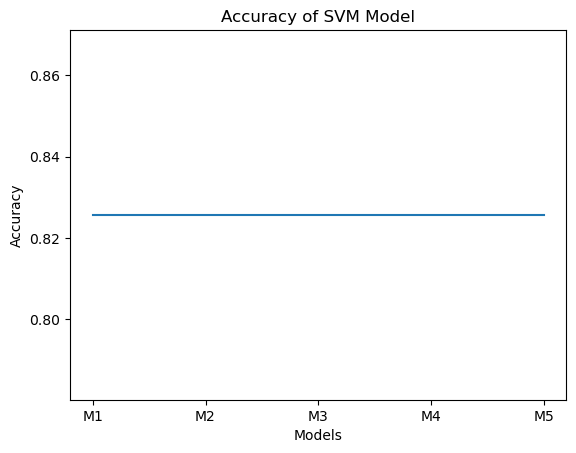

In [ ]:
# the plot for SVM
fig, ax = plt.subplots()
ax.plot(range(num_models), accuracies)
ax.set_xticks(range(num_models))
ax.set_xticklabels(['M1', 'M2', 'M3', 'M4', 'M5'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Accuracy of SVM Model')
plt.show()

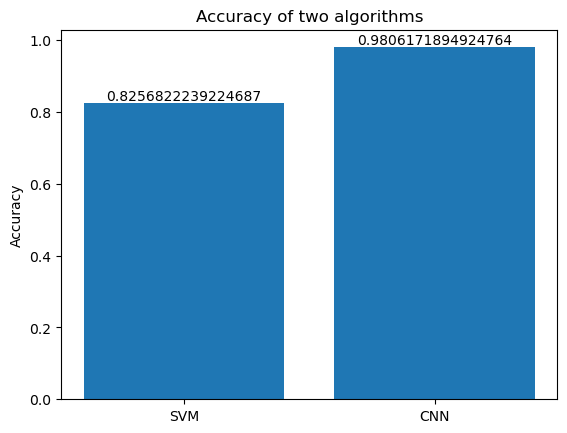

In [ ]:
# Plot for accuracies
fig, ax = plt.subplots()
x_labels = ['SVM', 'CNN']
x_pos = np.arange(len(x_labels))
accuracy_values = [svm_accuracy, cnn_accuracy]

ax.bar(x_pos, accuracy_values, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of two algorithms')

for i, v in enumerate(accuracy_values):
    ax.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

# Convert y_test to binary format with class 1 as positive
y_binary = label_binarize(y_test, classes=[0, 1, 2])
y_test_binary = y_binary[:, 1]  # Select class 1 as positive

y_pred_binary = np.zeros((len(y_pred), 2))
y_pred_binary[:, 1] = y_pred  # Positive class is in second column



In [ ]:
#Calculate and plot the ROC curve for SVM
svm_y_pred_prob = clf.predict_proba(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test_binary, svm_y_pred_prob[:,1])
svm_auc = auc(svm_fpr, svm_tpr)

plt.plot(svm_fpr, svm_tpr, label=f'SVM AUC: {svm_auc:.3f}')

# Calculate and plot the ROC curve for CNN
cnn_fpr, cnn_tpr, _ = roc_curve(y_test_binary, y_pred_binary[:, 1])
cnn_auc = auc(cnn_fpr, cnn_tpr)
plt.plot(cnn_fpr, cnn_tpr, label=f'CNN AUC: {cnn_auc:.3f}')

# Plot the 50% line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set the plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(svm_auc)
print(cnn_auc)